<a href="https://colab.research.google.com/github/divya87681/Dimensionality-reduction/blob/main/Dimensionality_Reduction_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

# Function to download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

<ipython-input-26-836ccc4d8ebc>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-26-836ccc4d8ebc>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


Dataset shape: (7352, 561)
First 5 rows of the dataset:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555 

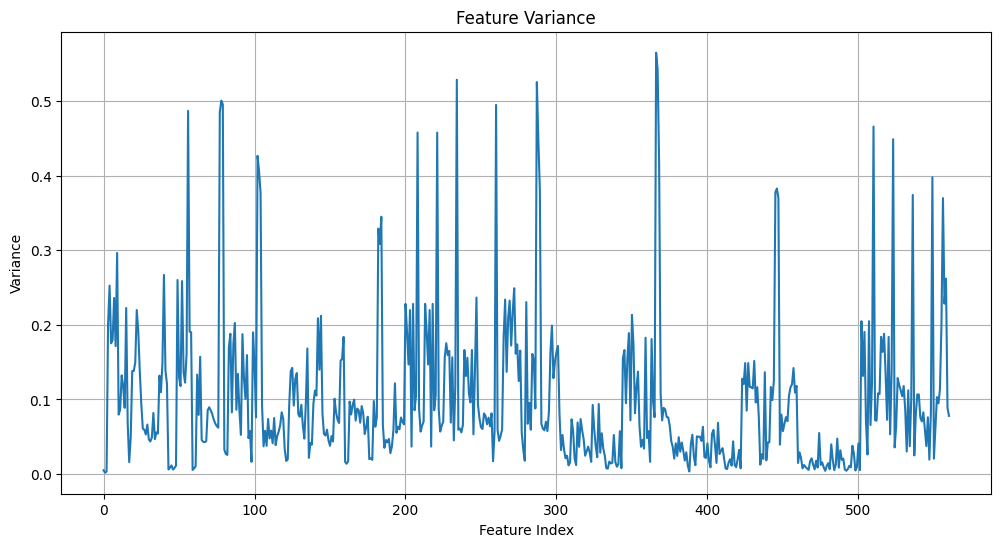


Low variance features (threshold < 0.01):
Index([  0,   1,   2,  43,  44,  46,  47,  59,  60, 333, 334, 340, 343, 388,
       402, 412, 413, 419, 422, 463, 465, 466, 467, 471, 473, 477, 478, 481,
       484, 487, 491, 492, 493, 495, 498, 499, 501],
      dtype='int64')

Distribution of target variable:
0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


<ipython-input-27-04af59ea91af>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_counts.index, y=y_counts.values, palette="viridis")


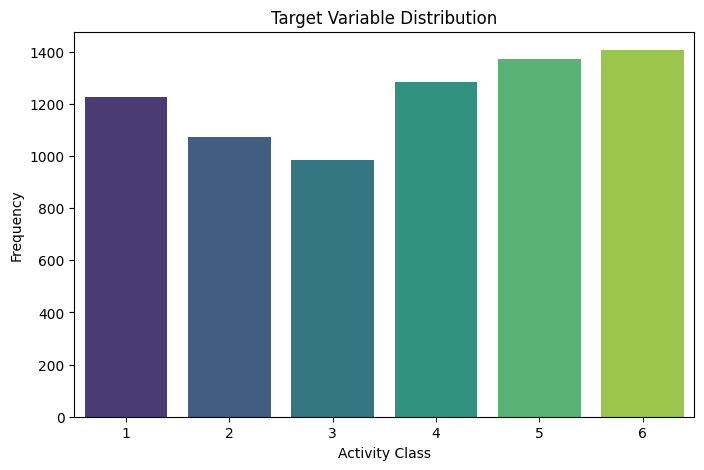

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()

#TASK 1 - DO EDA and understand a little about the data.
#Only important thing is to know that it has a lot of features that don't make sense, just a
#bunch of readings from sensors.
#We think many of these features are redundant or irrelevant, and we want to find good features.



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Perform EDA

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical summary:")
print(df.describe())

# Correlation matrix
print("\nComputing correlation matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
# plt.title("Correlation Matrix Heatmap")
# plt.show()

# Feature variance
print("\nFeature variance:")
feature_variance = df.var()
print(feature_variance)

# Visualize feature variance
plt.figure(figsize=(12, 6))
plt.plot(feature_variance.values)
plt.title("Feature Variance")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

# Identify low-variance features (arbitrarily set threshold)
low_variance_threshold = 0.01
low_variance_features = feature_variance[feature_variance < low_variance_threshold].index
print(f"\nLow variance features (threshold < {low_variance_threshold}):")
print(low_variance_features)

# Analyze target variable distribution
print("\nDistribution of target variable:")
y_counts = y[0].value_counts()
print(y_counts)

# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=y_counts.index, y=y_counts.values, palette="viridis")
plt.title("Target Variable Distribution")
plt.xlabel("Activity Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.shape

(7352, 561)

In [ ]:
df.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [ ]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [28]:
# Task 2: Encode class labels
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())

In [29]:
# Task 3: Scale the features using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
# Task 4: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=42) # Corrected the order of variables

In [31]:
start_time = time.time()
from sklearn.naive_bayes import GaussianNB # Importing GaussianNB

classifier_pipeline_full = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_full.fit(x_train, y_train) # Changed X_train_full to x_train
y_pred_full = classifier_pipeline_full.predict(x_test) # Changed X_test_full to x_test
end_time = time.time()
full_features_time = end_time - start_time
accuracy_full = accuracy_score(y_test, y_pred_full)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# TASK 7 - K-Means for dimensionality reduction
n_clusters = 50  # Choose the number of clusters (you can experiment with this value)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_scaled.T)  # Transpose to treat features as data points
closest_clusters = kmeans.labels_
selected_features_indices = []
for cluster in range(n_clusters):
    # Find the feature closest to the centroid of each cluster
    cluster_features_indices = np.where(closest_clusters == cluster)[0]
    closest_feature_index = cluster_features_indices[np.argmin(np.linalg.norm(df_scaled.T[cluster_features_indices] - kmeans.cluster_centers_[cluster], axis=1))]
    selected_features_indices.append(closest_feature_index)
selected_features = df_scaled[:, selected_features_indices]

In [34]:
start_time = time.time()
from sklearn.naive_bayes import GaussianNB

# Create and train the GaussianNB classifier
classifier_pipeline_reduced = Pipeline([
    ('classifier', GaussianNB())
])

# Split the data with selected features
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    selected_features, y, random_state=42
)

classifier_pipeline_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = classifier_pipeline_reduced.predict(X_test_reduced)
end_time = time.time()
reduced_features_time = end_time - start_time
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

print(f"Time taken with reduced features: {reduced_features_time:.4f} seconds")
print(f"Accuracy with reduced features: {accuracy_reduced:.4f}")

Time taken with reduced features: 0.0690 seconds
Accuracy with reduced features: 0.8215


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
